In [1]:

import pickle

import numpy as np


import matplotlib.pyplot as plt

from scipy.spatial import distance


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/MOT/'

/content/drive/MyDrive/MOT


In [4]:
with open('tracks_data_lacross_test_3CenterNet1080p_1s_CentroidTracker','rb') as fp:

  b=pickle.load(fp)

print(len(b))

11463


In [5]:
print(b[0])

[(1, 0, 1274.0, 713.0, 161.0, 363.0, 0.8581179, -1, -1, -1), (1, 1, 1.0, 728.0, 163.0, 348.0, 0.71958643, -1, -1, -1), (1, 2, 561.0, 462.0, 40.0, 114.0, 0.69902366, -1, -1, -1), (1, 3, 426.0, 434.0, 37.0, 111.0, 0.6671645, -1, -1, -1), (1, 4, 815.0, 431.0, 31.0, 87.0, 0.6067325, -1, -1, -1), (1, 5, 920.0, 583.0, 87.0, 113.0, 0.5928094, -1, -1, -1), (1, 6, 1702.0, 447.0, 53.0, 106.0, 0.545941, -1, -1, -1), (1, 7, 1037.0, 442.0, 31.0, 65.0, 0.516758, -1, -1, -1), (1, 8, 1426.0, 444.0, 43.0, 110.0, 0.5148291, -1, -1, -1), (1, 9, 1480.0, 445.0, 59.0, 137.0, 0.50242037, -1, -1, -1), (1, 10, 1617.0, 441.0, 42.0, 112.0, 0.49612114, -1, -1, -1), (1, 11, 333.0, 435.0, 66.0, 114.0, 0.4847323, -1, -1, -1), (1, 12, 1573.0, 450.0, 38.0, 101.0, 0.4547086, -1, -1, -1)]


In [6]:
out=[]
#(xmin, ymin, width, height)
for e in b:

  for e1 in e:

    out.append(e1)

out=np.vstack(out)

print(out.shape)

(105095, 10)


In [7]:
out[10].tolist()

[1.0, 10.0, 1617.0, 441.0, 42.0, 112.0, 0.4961211383342743, -1.0, -1.0, -1.0]

In [8]:
print(np.mean(out[:,-1]))



-1.0


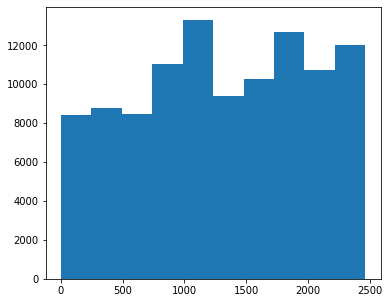

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.hist(out[:,1])
plt.show()


(2465,)


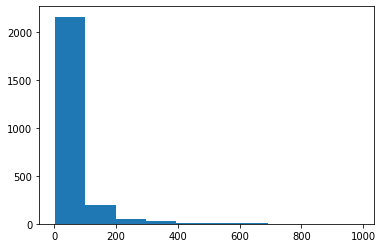

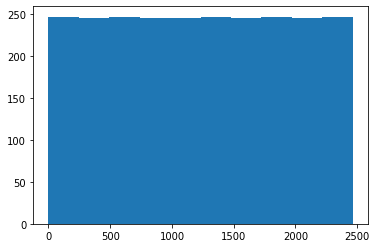

2464.0
2464.0


In [10]:
print(np.unique(out[:,1]).shape)

m=np.unique(out[:,1]).shape[0]
u=np.unique(out[:,1])
number_occurance=np.zeros(shape=[m])

for i in range(m):

  index=out[:,1]==u[i]
  number_occurance[i]=np.sum(index)



plt.hist(number_occurance)
plt.show()

plt.hist(u)
plt.show()
print(u.max())
print(u[-1])

id_sort=np.argsort(number_occurance)
number_occurance=number_occurance[id_sort][::-1].astype(int)
u=u[id_sort][::-1].astype(int)


In [11]:
print('first 10 occurances:\n',number_occurance[:10])

print('first 10 occurances ID:\n',u[:10].astype(int))


first 10 occurances:
 [987 688 681 650 615 604 580 563 530 526]
first 10 occurances ID:
 [1167 1035 2222 1323 2129    0    1 1095  915 1953]


0
track id is : 0
(604, 10)
time frame start time 1.0
604


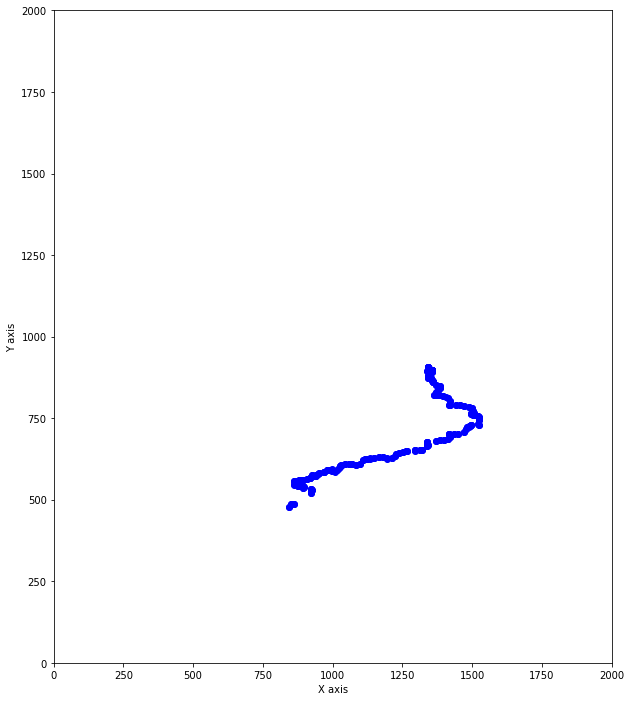

In [18]:
id=5
a=u[id]

print(a)
print('track id is : {}'.format(a))
index=out[:,1]==a

sub=out[index]
print(sub.shape)
print('time frame start time {}'.format(sub[0,0]))
#plt.hist(sub[:,0])
#plt.show()
print(len(np.unique(sub[:,0])))

x=sub[:,2]+sub[:,4]/2
y=sub[:,3]+sub[:,5]/2
plt.figure(figsize=(10,12))
plt.scatter(x,y,c='b')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.ylim(0,2000)
plt.xlim(0,2000)

plt.show()

In [15]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [19]:
def calculate_distance_traveled(x,y):

  dis=np.vstack([x,y]).T
  M=squareform(pdist(dis)) 
  d=0
  frame_numbers=x.shape[0]
  t=frame_numbers/59 ## 59 is the number of frames/sec
  print(t)
  for i in range(M.shape[0]):

    r=M[i,:]
    r=r[r>0]

    d+=np.min(r)


  speed=d/t
  return d,speed

d,speed=calculate_distance_traveled(x,y)

print('total traveled {:.02f} in pixels and his speed was {:.02f} pixels/sec'.format(d,speed))



10.23728813559322
total traveled 1022.74 in pixels and his speed was 99.90 pixels/sec
